<a href="https://colab.research.google.com/github/euijinsin/euijinsin/blob/main/AI4DL_mid_term.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mid-term exam on AI for Deep Learning

- Name:신의진  
- ID Number:20180653  

------------------------------------------
Firstly, copy this notebook to your google drive.  
Secondly, click 'Runtime' tab, 'Change runtime type' tab, and change 'Hardware accelerator' as 'GPU.'  
Now you are ready to go, good luck! :) 


In [1]:
import tensorflow as tf
tf.keras.__version__

'2.12.0'

## Generating data for the exam


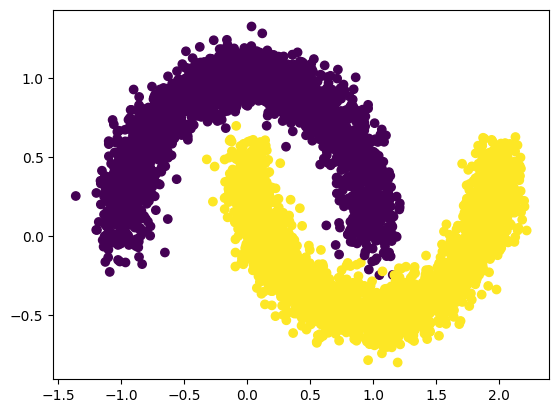

In [2]:
from sklearn.datasets import make_moons

inputs, targets = make_moons(n_samples=5000, noise=0.1)
inputs_dev, targets_dev = make_moons(n_samples=1000, noise=0.1)

import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets)
plt.show()

## Q1 We will use the generated data 

Inputs and targets are training data, and inputs_dev and targets_dev are validation data.

#### (Q1-1) [15 points] Check your data and design your neural network model
  - [5] Check dimension of inputs and targets. 
  - [5] Design a simple model using one hidden dense layer. 
    - Your hidden dense layer have dimension 3 with relu activation
    - Set the proper activation for binary outcome (0 or 1)  
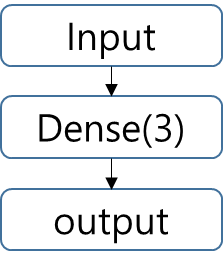
  - [5] Build your model and check model summary. The result should look like:

  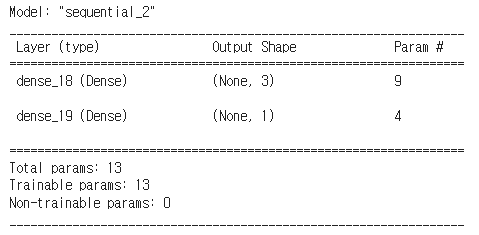



In [6]:
## change the code below to check dimension

inputs.shape

(5000, 2)

In [8]:
## change the code below to check dimension

targets.shape

(5000,)

In [35]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
## your code here
      layers.Dense(3, activation="relu")
])

In [41]:
## Build your model, and check the summary. your code here
model.build(input_shape=(None, 3))
model.weights
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 12        
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


#### (Q1-2) [12 points] Compile your model.  
 - [4] Setup optimizer as 'SGD'
 - [4] Use binary cross entropy loss.
 - [4] Set your evaluation metric as 'accuracy'



In [42]:
### Define optimizer, loss, and metrics here
model.compile(optimizer="SGD",
              loss="categorical_crossentropy",
              metrics="accuracy"
)

#### (Q1-3) [8 points] Train your model and check results.  
 - [4]  Fit your model using 100 number of epochs with batch size 100. Specify validation data using _inputs_dev_ and _targets_dev_ datasets. 
 - [4] Evaluate your model using _inputs_dev_ and _targets_dev_.

In [45]:
history = model.fit(
    ### Your code here
                    [input_data],
                    [output_data]
                    epochs=100
          )

SyntaxError: ignored

In [ ]:
## Evaluate your model. Your code here:
model.evaluate([input_data],
               [output_data])

32/32 [==============================] - 0s 2ms/step - loss: 0.2593 - accuracy: 0.8870


[0.259334534406662, 0.8870000243186951]

#### (Q1-4) [10 points] The current accuracy is not so good. Let's try having nine hidden dense layers to improve the model. 
  - Train and evaluate the model as done before. 
  - Try to visualzie the results.(sample visualization codes provided below)
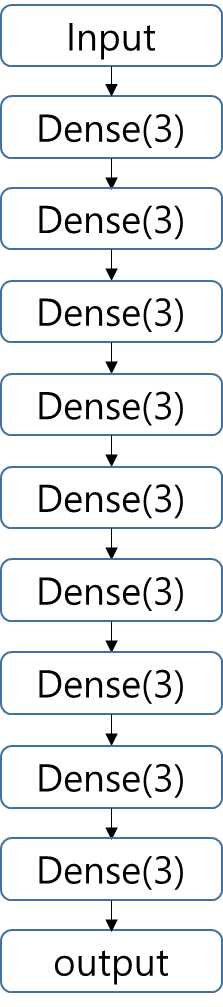



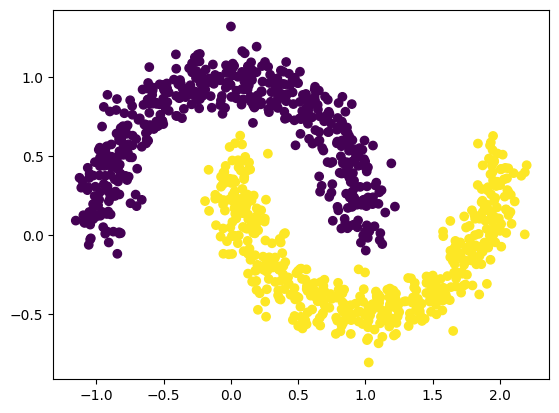

In [46]:
## Plot of the ground truth set
import matplotlib.pyplot as plt
plt.scatter(inputs_dev[:, 0], inputs_dev[:, 1], c=targets_dev)
plt.show()

In [47]:
## Plot of your model
## replace the result with your upgraded model
import matplotlib.pyplot as plt
res1 = model.predict(inputs_dev)
decision1 = res1 > .5
plt.scatter(inputs_dev[:, 0], inputs_dev[:, 1], c=decision1)
plt.show()


ValueError: ignored

In [48]:
model = models.Sequential([
## define your new model here

])

In [ ]:
### Define optimizer, loss, and metrics here
model.compile(optimizer=,
              loss=,
              metrics=[]
)

In [ ]:
history = model.fit(
    ### Your code here

          )

Epoch 1/100
50/50 [==============================] - 2s 8ms/step - loss: 0.6828 - accuracy: 0.4610 - val_loss: 0.6811 - val_accuracy: 0.4530
Epoch 2/100
50/50 [==============================] - 0s 5ms/step - loss: 0.6790 - accuracy: 0.5154 - val_loss: 0.6767 - val_accuracy: 0.6280
Epoch 3/100
50/50 [==============================] - 0s 5ms/step - loss: 0.6741 - accuracy: 0.6512 - val_loss: 0.6710 - val_accuracy: 0.6730
Epoch 4/100
50/50 [==============================] - 0s 6ms/step - loss: 0.6676 - accuracy: 0.6742 - val_loss: 0.6633 - val_accuracy: 0.7040
Epoch 5/100
50/50 [==============================] - 0s 5ms/step - loss: 0.6587 - accuracy: 0.7016 - val_loss: 0.6531 - val_accuracy: 0.7160
Epoch 6/100
50/50 [==============================] - 0s 5ms/step - loss: 0.6476 - accuracy: 0.7092 - val_loss: 0.6409 - val_accuracy: 0.7240
Epoch 7/100
50/50 [==============================] - 0s 6ms/step - loss: 0.6348 - accuracy: 0.7138 - val_loss: 0.6274 - val_accuracy: 0.7320
Epoch 8/100
5

In [ ]:
## Plot of the ground truth set
import matplotlib.pyplot as plt
plt.scatter(inputs_dev[:, 0], inputs_dev[:, 1], c=targets_dev)
plt.show()

In [ ]:
## Plot of your new model
import matplotlib.pyplot as plt
res1 = model.predict(inputs_dev)
decision1 = res1 > .5
plt.scatter(inputs_dev[:, 0], inputs_dev[:, 1], c=decision1)
plt.show()

## Q2 We will use the Boston housing data for Q2

In [49]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [50]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [51]:
train_data.shape

(404, 13)

In [52]:
import numpy as np 

indices_permutation = np.random.permutation(404)
shuffled_x_train = train_data[indices_permutation]
shuffled_train_targets = train_targets[indices_permutation]

num_validation_samples = 54

## Complete the code below: 
val_x = shuffled_x_train[:54] ## take first 54 samples of shuffled_x_train 
val_targets = shuffled_train_targets[:54] ## take first 54 samples of shuffled_train_targets 


trn_x = shuffled_x_train[num_validation_samples:]
trn_targets = shuffled_train_targets[num_validation_samples:]


#### (Q2-1) [16 points] Design your neural network model with the structure below

- We have two hidden Dense layers and one output layer as described below.
  - [4] Try to make your model using functional API
  - [4] Setup output sizes as 10 and 10 for hidden dense layers with relu activation.
  - [4] Setup appropriate output dense layer for this regression problem. 
  - [4] For compile your model, let's use the RMSprop optimizer and specify the MSE as the loss function. For evaluation metrics, let's use MAE and MSE.

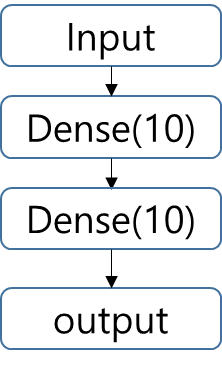

In [53]:
trn_x.shape

(350, 13)

In [54]:
from tensorflow import keras
from tensorflow.keras import layers
  
# define your model here using Functional API 


model.compile(
  # compile your model
              optimizer="rmsprop",
              loss="mean_squared_error",
              metrics="mean_absolute_error"

)


#### (Q2-2) [16 points] Fit your model. 
- [4] Use epoch size of 100, and batch size of 50.
- [4] Use trn_x and trn_targets as training data
- [4] Use val_x and val_targets as validation data 
- [4] Use ModelCheckpoint callback. Save the best one with respect to validation MAE.

In [63]:
## Define your callback here
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]

## fit your model
history = model.fit(trn_x, trn_targets,
          epochs=100,
          callbacks=callbacks_list,
          validation_data=(val_x, val_targets))

Epoch 1/100


ValueError: ignored

In [56]:
## Visualizing training result
import matplotlib.pyplot as plt
val_loss = history.history["val_mae"]
trn_loss = history.history["mae"]
epochs = range(1, 101)
plt.plot(epochs, val_loss, "b--",
         label="Validation MAE")
plt.plot(epochs, trn_loss, "r-",
         label="Training MAE")
plt.title("MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.ylim([1,25])
plt.legend()

NameError: ignored

#### (Q2-3) [8 points] Load the best model from your callback checkpoint. Evaluate your model on test data. 
- [4] Load the best model from your ModelCheckpoint callback
- [4] Report the MAE and MSE score on test data 

In [57]:
## Load the best model, and use model.evaluate to get MAE and MSE scores.
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])

#### (Q2-4) [15 points] Assuming that you have the Boston housing prices from 5 years ago, we have generated a fake dataset as below.

In [58]:
## house price 5 years ago
trn_price_5years_ago = trn_targets - 5 + np.random.random(len(trn_targets))*5 
val_price_5years_ago = val_targets - 5 + np.random.random(len(val_targets))*5 

We would like to create a multi-input model with 'Boston housing prices from 5 years ago' as input2. Try to make your model as below.

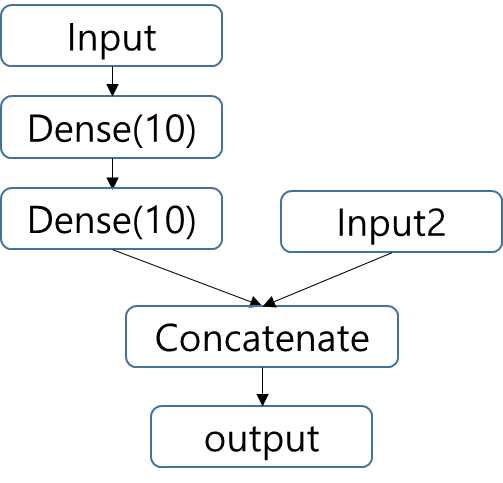


In [59]:
from tensorflow import keras
from tensorflow.keras import layers

## Your model here


## Compile your model
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics="mean_absolute_error")
model.summary()

ValueError: ignored

In [60]:
## Your model may look like this.
keras.utils.plot_model(model, "model2.png", show_shapes=True)

ValueError: ignored

In [61]:
## Fit your model 
    ## Specify training data, validation data

history = model.fit(##Specify training data ,
                    trn_targets,
                    epochs=100,
                    batch_size=50,
                    ##Specify validation data
    )

Epoch 1/100


ValueError: ignored

In [62]:
import matplotlib.pyplot as plt
val_loss = history.history["val_mae"]
trn_loss = history.history["mae"]
epochs = range(1, 101)
plt.plot(epochs, val_loss, "b--",
         label="Validation MAE")
plt.plot(epochs, trn_loss, "r-",
         label="Training MAE")
plt.title("MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.ylim([1,25])
plt.legend()

NameError: ignored